In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitudes and longitude combinations.
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lat_lngs = zip(lats,lngs)
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

621

In [4]:
# Adding API key to URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | lishu
Processing Record 3 of Set 1 | imeni babushkina
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | maba
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | florencia
Processing Record 14 of Set 1 | kysyl-syr
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 22 of Set 1 | abasolo
Processing Record 23 of Set

Processing Record 37 of Set 4 | vitim
Processing Record 38 of Set 4 | baiyin
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | odienne
Processing Record 41 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 4 | necochea
Processing Record 43 of Set 4 | lappeenranta
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | kloulklubed
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | tianpeng
Processing Record 49 of Set 4 | goundam
Processing Record 50 of Set 4 | buala
Processing Record 1 of Set 5 | araouane
Processing Record 2 of Set 5 | hualmay
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | menongue
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | linchuan
City not found. Skipping...
Processing Record 7 of Set 5 | barquisimeto
Processing Record 8 of Set 5 | bredasdorp
Processing Record 9 of Set 5 | marag

Processing Record 29 of Set 8 | evensk
Processing Record 30 of Set 8 | anloga
Processing Record 31 of Set 8 | morondava
Processing Record 32 of Set 8 | talara
Processing Record 33 of Set 8 | ha giang
Processing Record 34 of Set 8 | sitka
Processing Record 35 of Set 8 | zyryanka
Processing Record 36 of Set 8 | pocri
Processing Record 37 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 38 of Set 8 | gravdal
Processing Record 39 of Set 8 | laranjeiras do sul
Processing Record 40 of Set 8 | espanola
Processing Record 41 of Set 8 | levin
Processing Record 42 of Set 8 | ranau
Processing Record 43 of Set 8 | conneaut
Processing Record 44 of Set 8 | yefira
City not found. Skipping...
Processing Record 45 of Set 8 | obama
Processing Record 46 of Set 8 | maryville
Processing Record 47 of Set 8 | bobo dioulasso
Processing Record 48 of Set 8 | purpe
Processing Record 49 of Set 8 | sussex
Processing Record 50 of Set 8 | aracaju
Processing Record 1 of Set 9 | coihaique
Processing 

Processing Record 17 of Set 12 | najran
Processing Record 18 of Set 12 | oliveira dos brejinhos
Processing Record 19 of Set 12 | portoferraio
Processing Record 20 of Set 12 | athabasca
Processing Record 21 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 22 of Set 12 | tiarei
Processing Record 23 of Set 12 | guapore
Processing Record 24 of Set 12 | auki
Processing Record 25 of Set 12 | mulki
Processing Record 26 of Set 12 | itarema
Processing Record 27 of Set 12 | abalak
Processing Record 28 of Set 12 | broken hill
Processing Record 29 of Set 12 | salou
Processing Record 30 of Set 12 | ordzhonikidze
Processing Record 31 of Set 12 | ashqelon
Processing Record 32 of Set 12 | porto nacional
Processing Record 33 of Set 12 | valparaiso
Processing Record 34 of Set 12 | howard springs
Processing Record 35 of Set 12 | guantanamo
Processing Record 36 of Set 12 | peniche
Processing Record 37 of Set 12 | coahuayana
Processing Record 38 of Set 12 | constitucion
Processing Recor

In [7]:
# Convert the array of dictionaries into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,56.35,91,100,0.00,US,2022-07-01 15:09:57
1,Lishu,43.3047,124.3278,67.08,97,80,6.29,CN,2022-07-01 15:09:58
2,Imeni Babushkina,59.7573,43.1285,68.79,42,11,5.37,RU,2022-07-01 15:09:58
3,Leningradskiy,69.3833,178.4167,37.65,93,100,2.80,RU,2022-07-01 15:09:59
4,Iqaluit,63.7506,-68.5145,40.69,86,99,8.01,CA,2022-07-01 15:09:59
5,Vaini,-21.2000,-175.2000,71.76,100,20,5.75,TO,2022-07-01 15:09:59
6,Kapaa,22.0752,-159.3190,77.32,86,100,17.27,US,2022-07-01 15:10:00
7,Maba,24.6841,113.5984,76.77,95,100,3.24,CN,2022-07-01 15:10:00
8,Rikitea,-23.1203,-134.9692,72.19,72,100,22.01,PF,2022-07-01 15:10:00
9,Tiksi,71.6872,128.8694,43.30,68,99,3.02,RU,2022-07-01 15:10:01


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2022-07-01 15:09:57,40.5982,-124.1573,56.35,91,100,0.00
1,Lishu,CN,2022-07-01 15:09:58,43.3047,124.3278,67.08,97,80,6.29
2,Imeni Babushkina,RU,2022-07-01 15:09:58,59.7573,43.1285,68.79,42,11,5.37
3,Leningradskiy,RU,2022-07-01 15:09:59,69.3833,178.4167,37.65,93,100,2.80
4,Iqaluit,CA,2022-07-01 15:09:59,63.7506,-68.5145,40.69,86,99,8.01
5,Vaini,TO,2022-07-01 15:09:59,-21.2000,-175.2000,71.76,100,20,5.75
6,Kapaa,US,2022-07-01 15:10:00,22.0752,-159.3190,77.32,86,100,17.27
7,Maba,CN,2022-07-01 15:10:00,24.6841,113.5984,76.77,95,100,3.24
8,Rikitea,PF,2022-07-01 15:10:00,-23.1203,-134.9692,72.19,72,100,22.01
9,Tiksi,RU,2022-07-01 15:10:01,71.6872,128.8694,43.30,68,99,3.02


In [10]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'

# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df.Humidity
cloudiness = city_data_df.Cloudiness
wind_speed = city_data_df['Wind Speed']

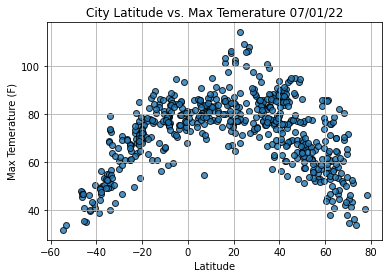

In [13]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temerature '+ time.strftime('%x'))
plt.ylabel('Max Temerature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

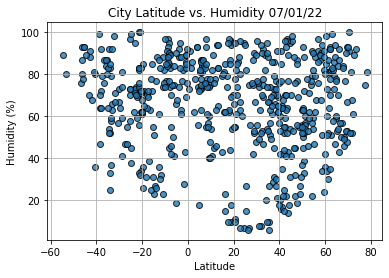

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

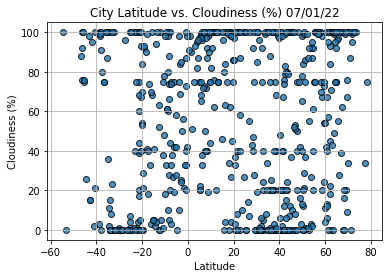

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

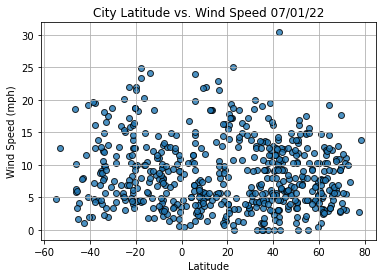

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()